Visualises the learned coefficients of regression and plots the graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Look at how the accuracy goes down as the coefficients are removed


In [3]:
# Reads in the best coefficients for each theta and plots them next to each other
t_0 = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/dtheta_1_max_fv/coefficients')
t_1 = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/dtheta_0_max_fv/coefficients')
t_prime = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/dtheta_1_max_fv/coefficients')

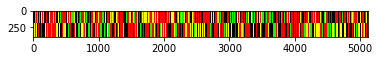

In [4]:
# Expand so they are more easily visible
t_1_vis = np.repeat(np.repeat(t_1 > 1e-10, 200, axis=0), 10, axis=1)
t_0_vis = np.repeat(np.repeat(t_0 > 1e-10, 200, axis=0), 10, axis=1)
t_prime_vis = np.repeat(np.repeat(t_prime > 1e-10, 200, axis=0), 10, axis=1)
color_coded = np.zeros((t_1_vis.shape[0], t_1_vis.shape[1], 3))
color_coded[:,:,0] = t_0_vis
color_coded[:,:,1] = t_1_vis
#color_coded[:,:,2] = t_prime_vis
plt.imshow(color_coded)

In [33]:
# Plots the graphs : the quality of prediction + the number of zero values
def plot_graph(folder, sin=True):
    results = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/%s/all_acc_pow.csv' % folder, delimiter=',')
    num_zer = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/%s/num_zero.csv' % folder, delimiter=',')
    #alphas = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/%s/alpha.csv' % folder, delimiter=',')
    
    
    t = np.vstack((results[:-1,0], num_zer[:-1,0]))
    
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    
    if sin:
        index = 0
    else:
        index = 1
    
    ax2.plot(results[:-1,0], 'r')
    ax2.plot(results[:-1,1], 'r--')
    ax.plot(num_zer[:-1,index], color='b')
    
    ax.set_xlabel('alpha')
    ax2.set_ylabel('L1 Error')
        
    ax2.set_xlabel('alpha')
    ax.set_ylabel('# Non Zero Components')
    
    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)
        return None
    color_y_axis(ax2, 'r')
    color_y_axis(ax, 'b')
    
    if sin:
        plt.title(r'L1 Error for Sin (theta) prediction ')
    else:
        plt.title(r'L1 Error for Cos (theta) prediction ')
    plt.legend(['sin theta', 'cos theta'])
    #plt.xticks(range(0, len(alphas)), ('0', '1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '1e-0'))


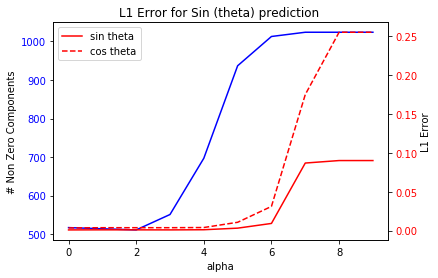

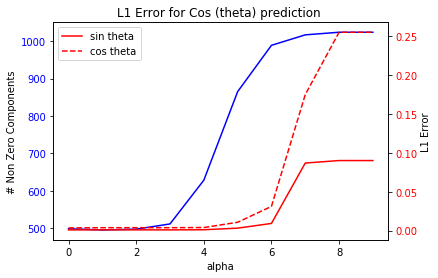

In [34]:
plot_graph('dtheta_-1_max')
plot_graph('dtheta_-1_max', sin=False)

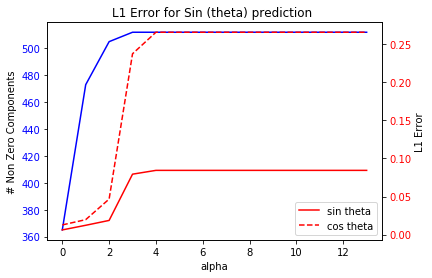

In [35]:
plot_graph('dtheta_1_max_fv_vp', sin=True)

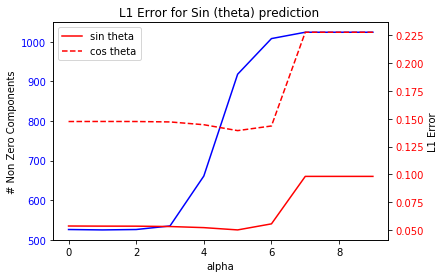

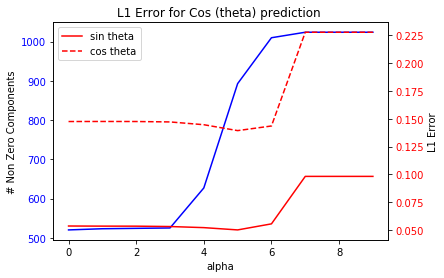

In [36]:
plot_graph('dtheta_0_max', sin=True)
plot_graph('dtheta_0_max', sin=False)

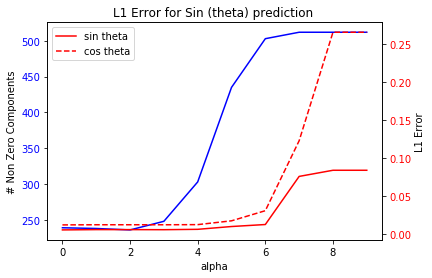

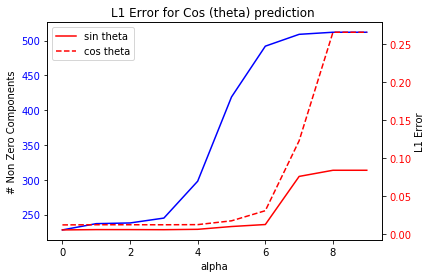

In [37]:
plot_graph('dtheta_1_max_fv', sin=True)
plot_graph('dtheta_1_max_fv', sin=False)

In [38]:
def plot_difference(file_names, sin):
    results = np.empty((1,))
    if sin:
        index = 0
    else:
        index = 1
    
    for folder in file_names:
        resultst = np.loadtxt('/scratch/local/ssd/ow/results_ijcv_experiments/%s/all_acc_pow.csv' % folder, delimiter=',')[:,index].min()
        results = np.vstack((results, resultst))
    fig, ax = plt.subplots()
    results = results[1:]
    ax.plot(results, color='r')
    
    ax.set_xlabel('Layer')
    ax.set_ylabel('Error')
    
    if sin:
        plt.title('L1 Error for Sin (theta) prediction ')
    else:
        plt.title('L1 Error for Cos (theta) prediction ')
    

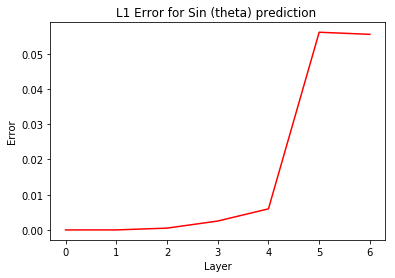

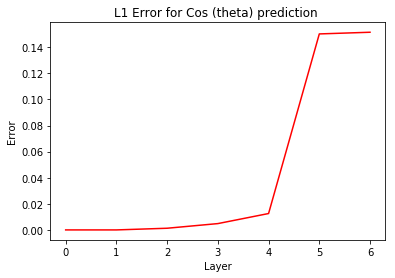

In [39]:
file_names = [
    'dtheta_1_max_angleencoder1',
    'dtheta_1_max_angleencoder2',
    'dtheta_1_max_fv_up_2',
    'dtheta_1_max_fv_up_1',
    'dtheta_1_max_fv',
    'dtheta_1_max_input',
    'dtheta_1_max',
]
plot_difference(file_names, sin=True)
plot_difference(file_names, sin=False)

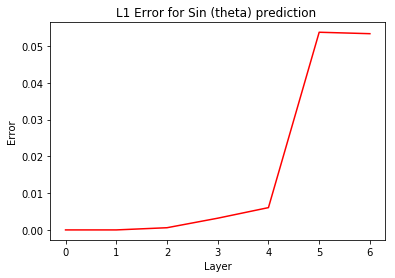

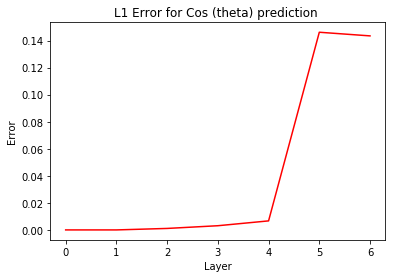

In [40]:
file_names = [
    'dtheta_1_avg_angleencoder1',
    'dtheta_1_avg_angleencoder2',
    'dtheta_1_avg_fv_up_2',
    'dtheta_1_avg_fv_up_1',
    'dtheta_1_avg_fv',
    'dtheta_1_avg_input',
    'dtheta_1_avg',
]
plot_difference(file_names, sin=True)
plot_difference(file_names, sin=False)